# Principal Component Analysis with Cancer Data

In [86]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [87]:
data=pd.read_csv("breast-cancer-wisconsin-data.csv")
data.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [88]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [89]:
data.dtypes
#need to convert Bare Nuclei from oject type to catogery 

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [90]:
data.shape

(699, 11)

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [92]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [93]:
data.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
Normal Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
Class,-0.080226,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


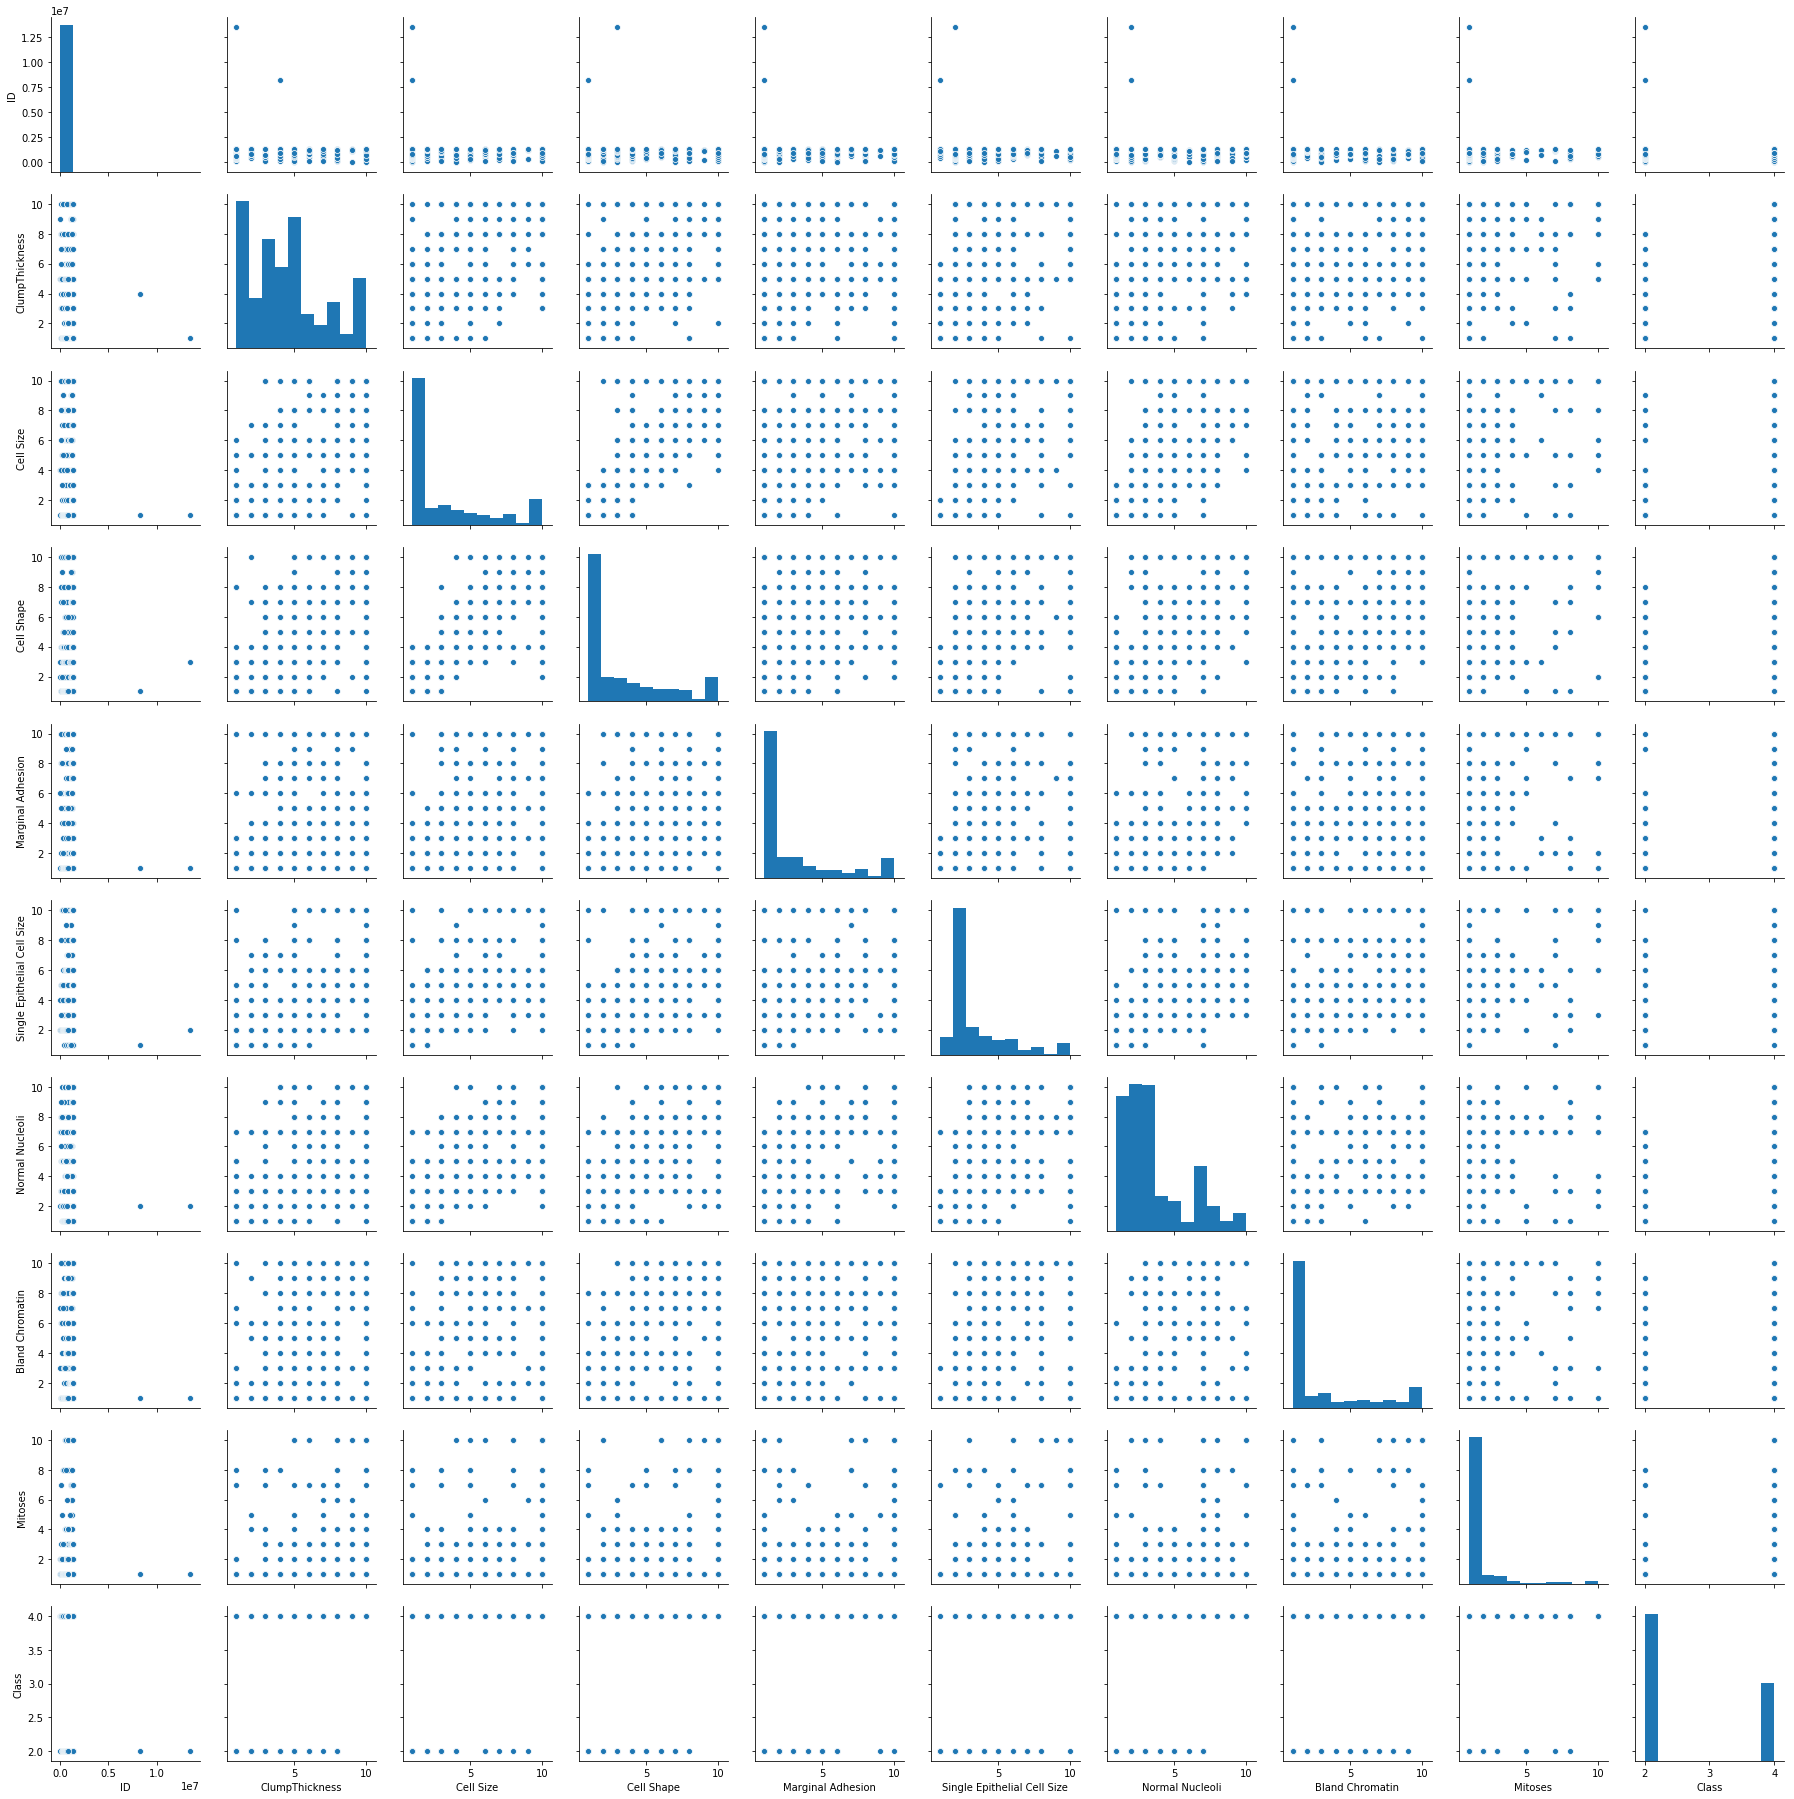

In [94]:
sns.pairplot(data)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [95]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [96]:
data.isnull().sum()
#here it does not counts "?" as missing vlaue .

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [97]:
data=data.replace('?',np.nan)

In [98]:
data.isnull().sum()

ID                              0
ClumpThickness                  0
Cell Size                       0
Cell Shape                      0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Normal Nucleoli                 0
Bland Chromatin                 0
Mitoses                         0
Class                           0
dtype: int64

In [99]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
# as I have replaced "?" with NAN and we founded there are 16 NAN in Bare Nuclei . 

In [100]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [102]:
# now I change datatype of Column Bare Nuclri to int 
data=data.fillna(data.median())

In [107]:
data["Bare Nuclei"]=data["Bare Nuclei"].astype('int64')

In [108]:
data.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [109]:
# Check for correlation of variable
data.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


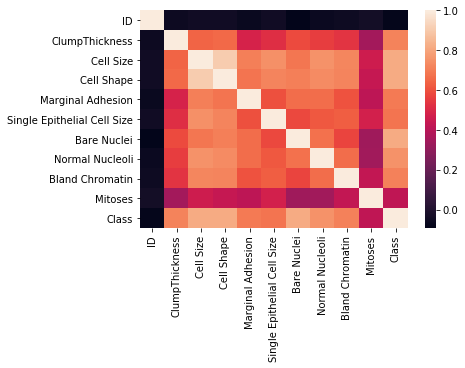

In [112]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables
sns.heatmap(data.corr())

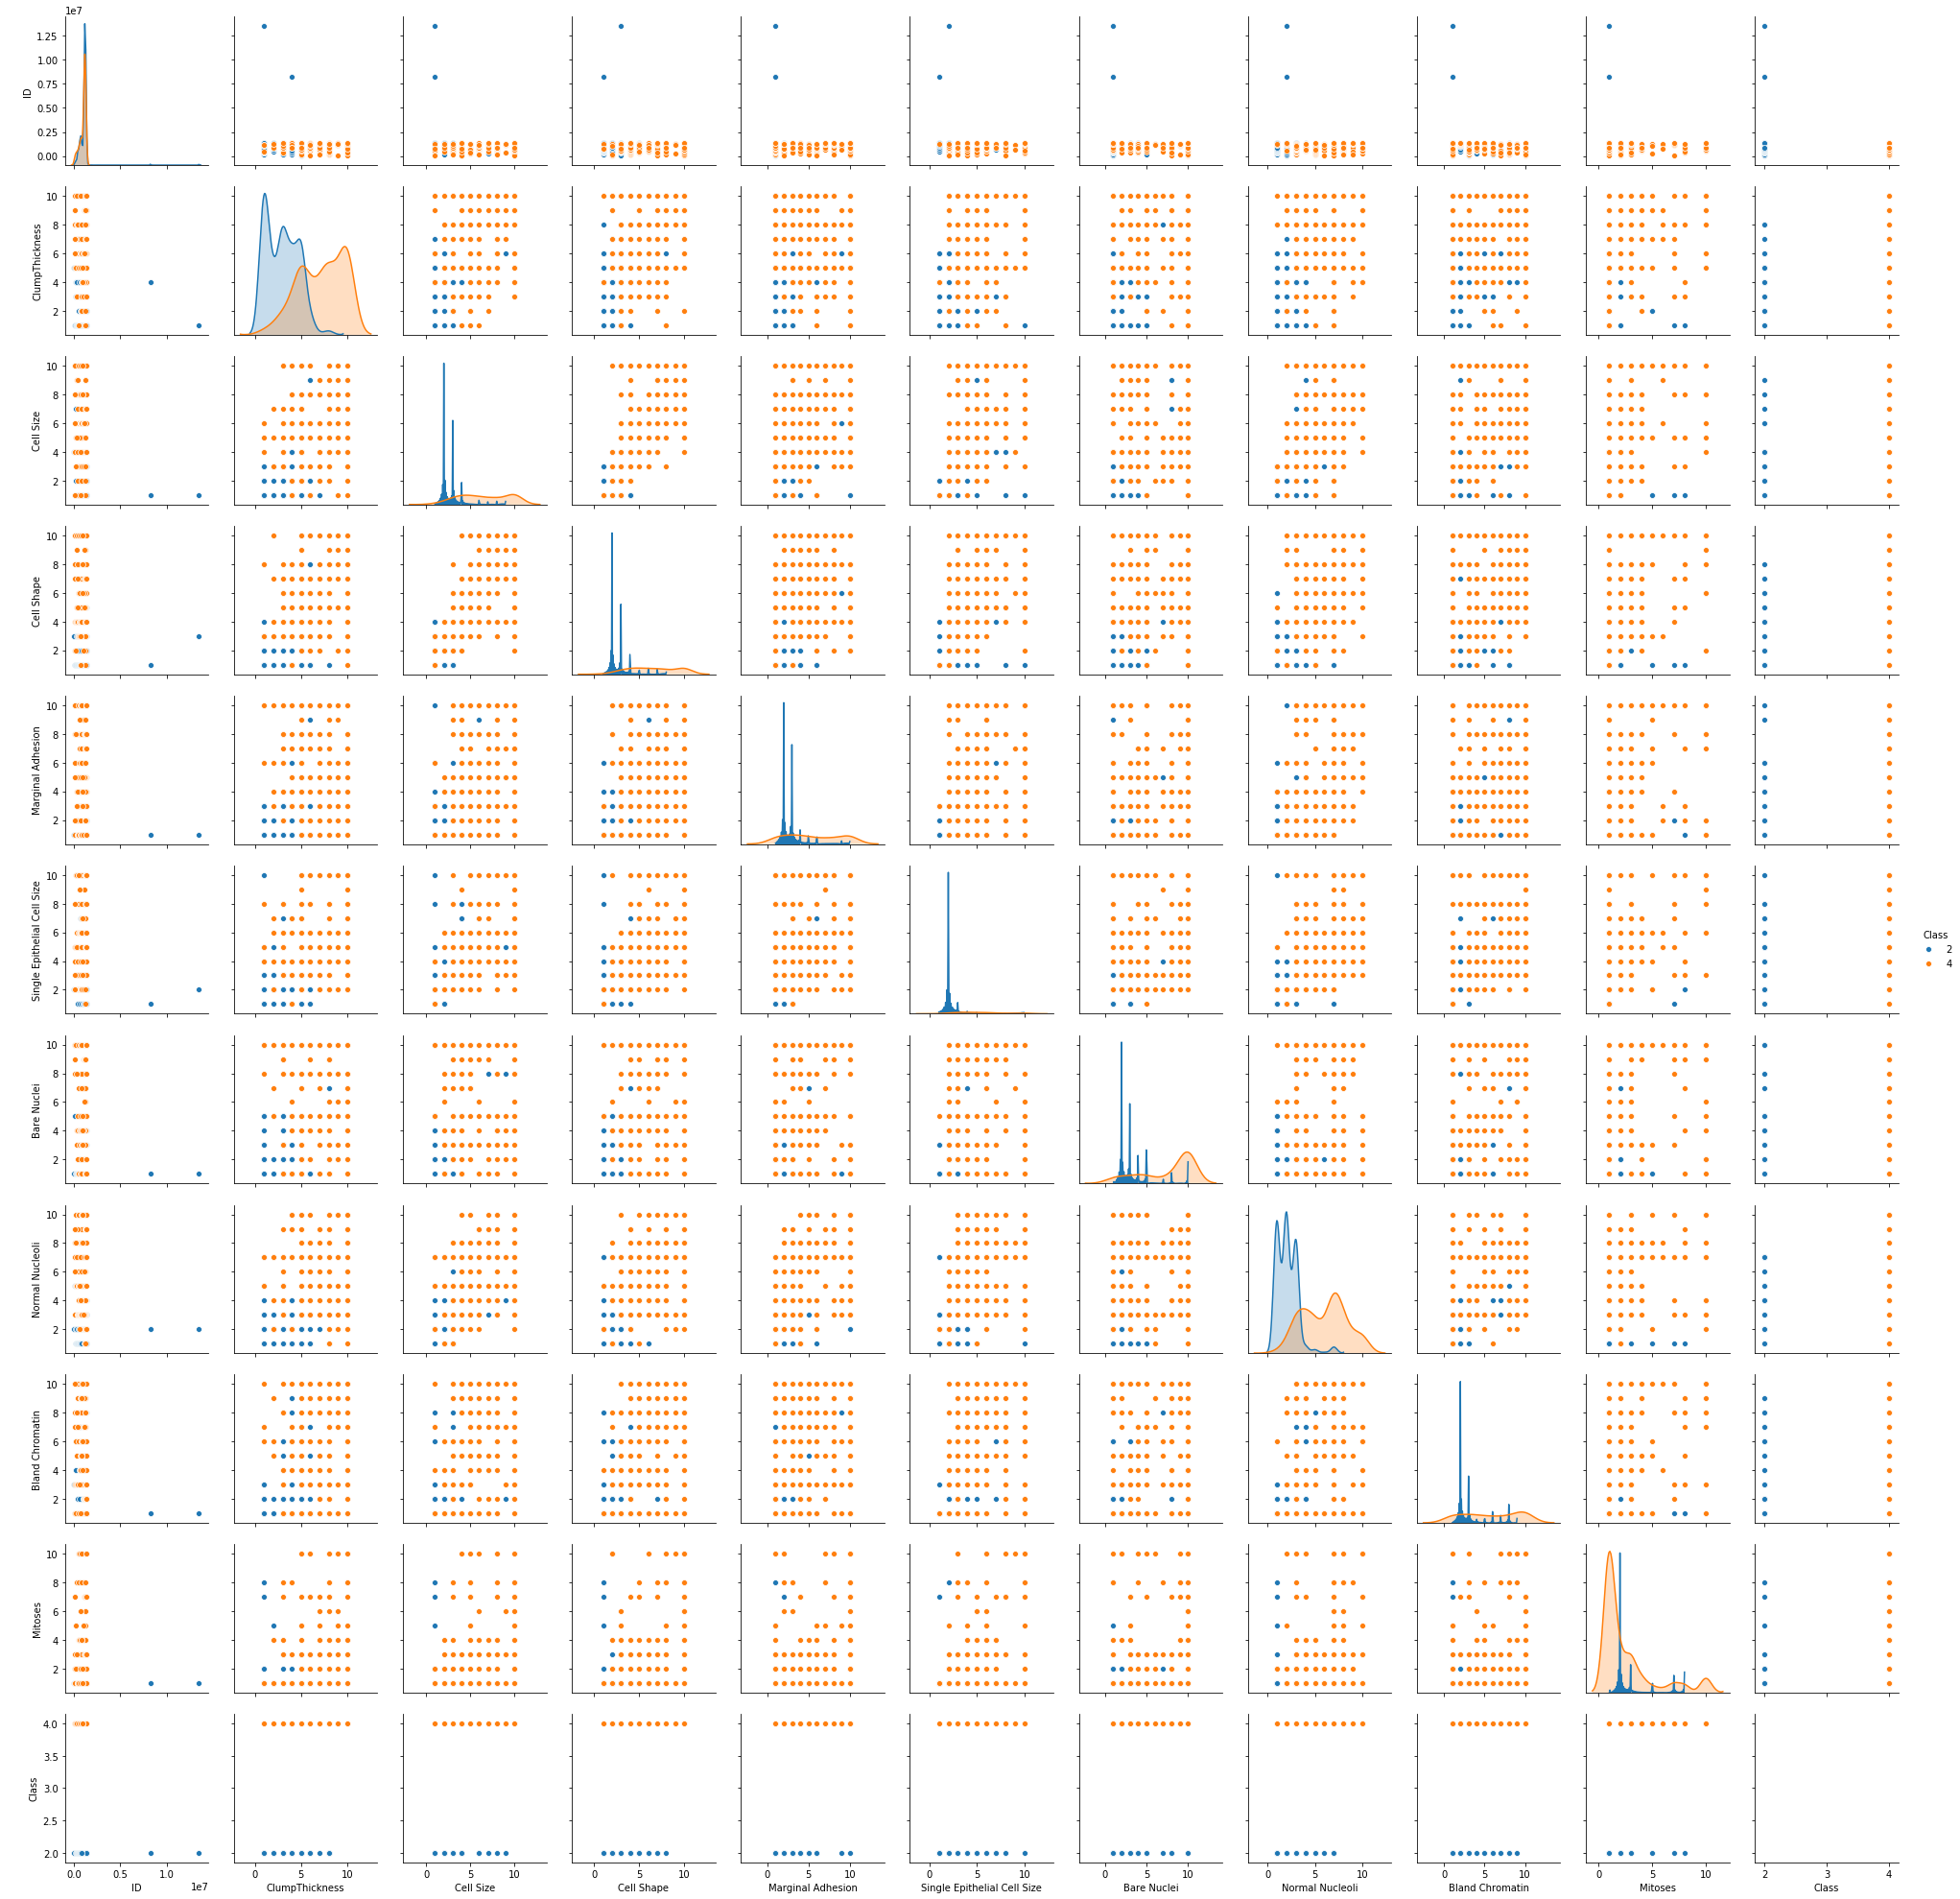

In [116]:
#Let us check for pair plots
sns.pairplot(data,hue='Class',diag_kind='kde' )

In [ ]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [ ]:
# We could see most of the outliers are now removed.

In [119]:
data1=data.drop(["ClumpThickness","Mitoses"], axis=1)

In [120]:
data1.head()

,ID,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Class
0,1000025,1,1,1,2,1,3,1,2
1,1002945,4,4,5,7,10,3,2,2
2,1015425,1,1,1,2,2,3,1,2
3,1016277,8,8,1,3,4,3,7,2
4,1017023,1,1,3,2,1,3,1,2


# Q6 Create a covariance matrix for identifying Principal components

In [ ]:
# PCA
# Step 1 - Create covariance matrix


In [130]:
from sklearn.model_selection import train_test_split

In [131]:
x=data1.drop(["Class"],axis=1)
Y=data1["Class"]

In [132]:
xtrain,xtest,ytrain,ytest=train_test_split(x,Y,test_size=0.30,random_state=10)

In [134]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [135]:

sc = StandardScaler()
X_train_std =  sc.fit_transform(xtrain)          
train_cov_matrix = np.cov(X_train_std.T)
print('Covariance Matrix \n%s', train_cov_matrix)


Covariance Matrix 
%s [[ 1.00204918 -0.02297207 -0.02266423 -0.03862196 -0.01570614 -0.06009707
  -0.04250716 -0.05558935]
 [-0.02297207  1.00204918  0.91043389  0.70488408  0.74275024  0.68351267
   0.76257447  0.70227554]
 [-0.02266423  0.91043389  1.00204918  0.6708164   0.70679256  0.69487879
   0.74286655  0.69849391]
 [-0.03862196  0.70488408  0.6708164   1.00204918  0.59961577  0.62955063
   0.64220768  0.58078889]
 [-0.01570614  0.74275024  0.70679256  0.59961577  1.00204918  0.57657155
   0.634409    0.62191394]
 [-0.06009707  0.68351267  0.69487879  0.62955063  0.57657155  1.00204918
   0.67910613  0.55924167]
 [-0.04250716  0.76257447  0.74286655  0.64220768  0.634409    0.67910613
   1.00204918  0.66059458]
 [-0.05558935  0.70227554  0.69849391  0.58078889  0.62191394  0.55924167
   0.66059458  1.00204918]]


# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [136]:
eigenvalues, eigenvectors = np.linalg.eig(train_cov_matrix)

In [137]:
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-2.35442170e-02  9.96962469e-01  1.11479403e-03  3.48200498e-02
   4.70602538e-02 -2.79451304e-02 -3.59853976e-02  2.69801080e-03]
 [ 4.12542103e-01  3.57845165e-02  7.42650461e-01 -1.06464818e-01
  -7.21484689e-02  1.41472190e-01  4.18040841e-01 -2.56292978e-01]
 [ 4.06505012e-01  3.40896684e-02 -6.59180631e-01 -8.75669107e-02
   3.39002192e-02  1.87517911e-01  4.42080302e-01 -3.99571416e-01]
 [ 3.58586040e-01 -2.47104381e-05 -5.94347408e-02  4.05196058e-01
  -5.06584918e-01 -6.67706393e-01  1.34051923e-02  3.25562989e-02]
 [ 3.63394094e-01  4.39117177e-02 -6.81710254e-02 -3.91730237e-01
  -5.62142198e-01  3.93093802e-01 -4.24889776e-01  2.38450659e-01]
 [ 3.58474739e-01 -3.48634361e-02  5.42965076e-02  6.22711785e-01
   2.88823436e-01  3.25558210e-01 -4.88341282e-01 -2.27327939e-01]
 [ 3.82365591e-01 -2.03402824e-03 -4.93108548e-02  1.00799511e-01
   3.51497461e-01  4.87311062e-02  2.71372463e-01  8.01019423e-01]
 [ 3.58694242e-01 -2.18027882e-02  1.97610038e-02 -

# Q8 Find variance and cumulative variance by each eigen vector

In [139]:
train_eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
train_eig_pairs.sort()

train_eig_pairs.reverse()
print(train_eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
train_eigvalues_sorted = [train_eig_pairs[index][0] for index in range(len(eigenvalues))]
train_eigvectors_sorted = [train_eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %train_eigvalues_sorted)

[(5.0787625245097185, array([-0.02354422,  0.4125421 ,  0.40650501,  0.35858604,  0.36339409,
        0.35847474,  0.38236559,  0.35869424])), (1.0031628273577398, array([ 9.96962469e-01,  3.57845165e-02,  3.40896684e-02, -2.47104381e-05,
        4.39117177e-02, -3.48634361e-02, -2.03402824e-03, -2.18027882e-02])), (0.47935364154309584, array([ 0.03482005, -0.10646482, -0.08756691,  0.40519606, -0.39173024,
        0.62271178,  0.10079951, -0.51402131])), (0.3943159688483654, array([ 0.04706025, -0.07214847,  0.03390022, -0.50658492, -0.5621422 ,
        0.28882344,  0.35149746,  0.46024899])), (0.3778153264536169, array([-0.02794513,  0.14147219,  0.18751791, -0.66770639,  0.3930938 ,
        0.32555821,  0.04873111, -0.48510235])), (0.3122738386710136, array([-0.0359854 ,  0.41804084,  0.4420803 ,  0.01340519, -0.42488978,
       -0.48834128,  0.27137246, -0.36834857])), (0.2833674663491257, array([ 0.00269801, -0.25629298, -0.39957142,  0.0325563 ,  0.23845066,
       -0.22732794,  

In [142]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(train_eigvalues_sorted, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

var_explained , cum_var_exp

([0.6335470633846478,
  0.1251389212041352,
  0.059796671030938324,
  0.04918869959049138,
  0.047130337246770196,
  0.03895440523298942,
  0.035348497847232443,
  0.010895404462795251],
 array([0.63354706, 0.75868598, 0.81848266, 0.86767136, 0.91480169,
        0.9537561 , 0.9891046 , 1.        ]))

In [144]:
print('variance explained : \n%s' %var_explained)

variance explained : 
[0.6335470633846478, 0.1251389212041352, 0.059796671030938324, 0.04918869959049138, 0.047130337246770196, 0.03895440523298942, 0.035348497847232443, 0.010895404462795251]


In [145]:
print('cumulative variance  : \n%s' %cum_var_exp)

cumulative variance  : 
[0.63354706 0.75868598 0.81848266 0.86767136 0.91480169 0.9537561
 0.9891046  1.        ]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [146]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(train_eigvectors_sorted[0:4])   # Reducing from 8 to 4 dimension space

X_std_4D = np.dot(X_train_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_4D)  # converting array to dataframe for pairplot

In [147]:
Proj_data_df

,0,1,2,3
0,4.052966,-0.930941,-0.124040,1.485535
1,-1.602778,0.398596,-0.003056,0.134616
2,2.333864,0.420749,0.090427,-2.554574
3,1.961758,0.236818,0.327850,1.145746
4,1.144902,0.160035,0.301511,0.598513
5,-0.864859,0.319966,0.291207,-0.283850
6,-1.752732,0.136940,-0.053389,-0.021321
7,-1.111697,0.212877,0.454080,-1.311920
8,-1.908172,-0.120327,0.111920,0.216595
9,2.279779,0.115759,1.352558,0.373062


# Q10 Find correlation between components and features

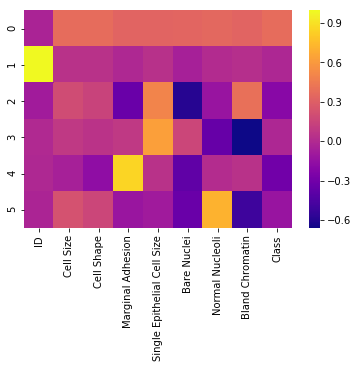

In [182]:
 
pca = PCA(n_components=6) 
df_new = pca.fit_transform(data1) 
df_pca = pd.DataFrame(pca.components_, columns=data1.columns) 
sns.heatmap(df_pca,cmap='plasma',) 
 


In [ ]:
#PCA5 is highly positively coorelated with Normal Nucleoli 
#PCA5 is highly negatively coorelated wuth Bland Chromatin 
#PCA4 is highly positively correlated with Marginal Adhesion
#PCA2 is negatively correlated with Marginal Adhension and Bare Nuclei . 

# Content Based Recommendation System - Optional ( Q11 - Q18 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16  Create cosine similarity matrix

# Q17  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q18 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q19 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [152]:
dfj=pd.read_csv("jokes.csv")

In [156]:
dfj.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [158]:
dfj.shape

(24983, 101)

# Q20 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [164]:
ratings=dfj.iloc[0:200,1:]
ratings.shape

(200, 100)

# Q21 Change the column indices from 0 to 99

In [166]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [167]:
x1=np.arange(100)

In [168]:
ratings.columns=x1

In [169]:
ratings.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64')

# Q22 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [170]:
ratings=ratings.replace(99.00,0)

In [171]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q23 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [173]:
sc_ratings=sc.fit_transform(ratings)
sc_ratings

array([[-1.85701632,  1.67164929, -2.21918089, ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 0.78949409, -0.1802773 ,  1.3727099 , ...,  0.07059963,
        -1.36765027,  0.16746078],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       ...,
       [ 0.46479617, -0.89412566, -0.3156133 , ..., -0.23610604,
         0.18266036, -0.02590486],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 1.12308784, -1.60593445, -1.07569506, ..., -0.02685824,
        -0.04144395, -0.16095388]])

### Popularity based recommendation system

# Q24  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [176]:
sc_ratings=pd.DataFrame(sc_ratings)

In [177]:
sc_ratings

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.240830,-1.785253,0.877475,-2.233712,-1.132409,...,0.772232,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,-0.160954
1,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.505530,-0.160595,-1.083559,2.200591,1.667223,...,0.772232,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.167461
2,-0.117881,-0.121130,-0.053284,0.181880,1.672963,1.814094,1.578074,1.929134,-0.004146,-0.179172,...,-0.192459,-0.055329,-0.362193,2.435660,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
3,-0.117881,1.581908,-0.053284,0.181880,0.339079,1.560803,-0.532913,1.298139,-0.004146,0.189306,...,-0.192459,-0.055329,-0.362193,-0.031131,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
4,1.772484,0.819110,-0.988252,-1.216599,0.257903,0.063882,1.223570,0.968206,-0.113390,0.968316,...,1.582983,1.707868,0.975838,1.313343,1.557140,0.380786,0.727864,1.850639,0.511142,0.330133
5,-1.490063,-0.843136,0.045369,-2.023513,-1.301062,-1.286999,-1.578608,-0.161811,-1.655217,-0.539640,...,-1.403455,-2.232467,-0.575275,-1.038043,-0.835272,-1.266839,-0.217896,-2.629557,-1.591755,-1.219861
6,-0.117881,-0.121130,-0.053284,0.181880,1.591786,-2.548886,1.344707,1.830154,-0.004146,-0.179172,...,-0.192459,-0.055329,-0.362193,-0.184043,-0.175922,0.643062,-0.233349,-0.026858,-0.041444,-0.160954
7,1.403307,0.523373,2.002748,-1.429354,-1.498469,-0.689143,1.620828,0.308342,-1.292726,-1.064321,...,2.280845,-0.409232,-0.393528,-1.822800,-1.131677,-1.266839,0.428065,-0.041190,0.360716,-0.160954
8,-0.960761,-0.843136,-2.165370,-1.605786,-1.605475,-0.367396,-0.972924,-1.823844,-1.955637,-0.499588,...,1.302470,-0.146965,0.944503,-0.267712,-0.263634,-0.237914,-0.322980,-0.109984,-1.085217,-1.680255
9,0.551531,0.929247,1.101412,0.962849,1.189591,0.873954,1.560259,0.537233,0.743180,1.454948,...,-0.192459,1.357125,-0.362193,-0.184043,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954


In [180]:
sc_ratings.mean().sort_values(ascending=False).head(10)

98    1.840889e-16
81    1.243450e-16
97    1.198694e-16
20    1.065814e-16
94    1.054712e-16
92    8.770762e-17
47    7.771561e-17
73    7.743806e-17
99    7.549517e-17
49    7.494005e-17
dtype: float64